<a href="https://colab.research.google.com/github/Gautam-Jaiswal/Stock-Project/blob/main/Stock_Prediction_Final_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References :- 'https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/'

https://www.sciencedirect.com/science/article/pii/S2666827022000378


In [ ]:
pip install yfinance

In [3]:
stock_name = 'AAPL'

#GETTING AND CLEANSING OF DATA

In [4]:
import pandas as pd
import numpy as np
from numpy import array
import yfinance as yf

from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px

import urllib.request
from PIL import Image

from skimage import io

import matplotlib.pyplot as plt

In [33]:
#1y,2y,5y,10y
df = yf.download(tickers=stock_name, period='2y' , interval='1d')
df_charts = yf.download(tickers=stock_name, period='5y' , interval='1d')

tick = yf.Ticker(stock_name)
share_holders = tick.institutional_holders
news = tick.news
info = tick.info

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-20,42.572498,42.639999,42.389999,42.494999,40.408482,65049600
2017-11-21,42.695000,43.424999,42.695000,43.285000,41.159702,100525200
2017-11-22,43.340000,43.750000,43.262501,43.740002,41.592350,102355600
2017-11-24,43.775002,43.875000,43.662498,43.742500,41.594734,56106800


## Remove any null values if present

In [34]:
if(not all(df.isna().sum())):
  print('GOOD DATA-SET')
else:
  print('CLEARING DATA-SET.............')
  pd.df.dropna(axis = 0, how ='any', inplace=True)

GOOD DATA-SET


#EDA

In [ ]:
info['longBusinessSummary']

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers excl

In [ ]:
fig_1 = go.Figure(data=[go.Candlestick(x=df_charts.index,
                open=df_charts['Open'],
                high=df_charts['High'],
                low=df_charts['Low'],
                close=df_charts['Close'])])
fig_1.update_layout(
    title=f'CANDLE STICK CHART FOR {stock_name} STOCK',
    yaxis_title='VALUE OF STOCK IN USD($)')

fig_1.show()

In [ ]:
fig = px.line(df_charts, x=df_charts.index, y='High', title=f'LINE CHART OF {stock_name} STOCK')

fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
px.histogram(x = share_holders.Holder, y = share_holders.Value,
             color = share_holders.Holder,
             labels = {'x' : "Share Holder's Names", 'y': "Value of Shares"})

In [ ]:
news_title = [None] *4
news_link = [None] *4
news_thumbnail = [None] *4
for i in range(0,4):
  news_title[i] = news[i]['title']
  news_link[i] = news[i]['link']
  news_thumbnail[i] = news[i]['thumbnail']['resolutions'][0]['url']

In [ ]:
img = [None] *4
for i in range(0,4):
  urllib.request.urlretrieve(news_thumbnail[i], f'n{i}.png')
  temp = Image.open(f'n{i}.png')
  basewidth = 300
  wpercent = (basewidth / float(temp.size[0]))
  hsize = int((float(temp.size[1]) * float(wpercent)))
  img[i] = temp.resize((basewidth, hsize), Image.ANTIALIAS)

Is PTON Stock A Buy Or Sell In November 2022 After Earnings?
https://finance.yahoo.com/m/dd20d049-ca20-33f2-9c5a-c61882463b05/is-pton-stock-a-buy-or-sell.html


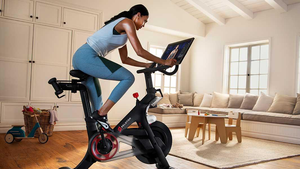

In [ ]:
print(news_title[0])
print(news_link[0])
img[0]

5 of Walmart’s best early Black Friday Deals, including an Apple Watch, a 55-inch LG TV under $300 and a deeply discounted Bissell vacuum
https://finance.yahoo.com/m/643665c8-53c9-35f8-acd1-bb5a0dbe59a3/5-of-walmart%E2%80%99s-best-early.html


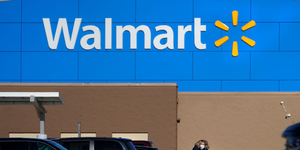

In [ ]:
print(news_title[1])
print(news_link[1])
img[1]

4 Charts That Show Why Apple Could Outperform the Markets in 2023
https://finance.yahoo.com/m/4eb75913-e99b-3f90-9161-105c7f7c0b9b/4-charts-that-show-why-apple.html


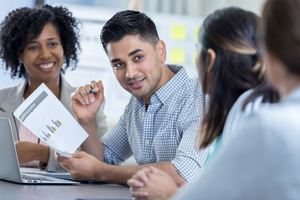

In [ ]:
print(news_title[2])
print(news_link[2])
img[2]

Ken Fisher Super Stocks: 10 Biggest Small-Cap Stocks
https://finance.yahoo.com/news/ken-fisher-super-stocks-10-145227573.html


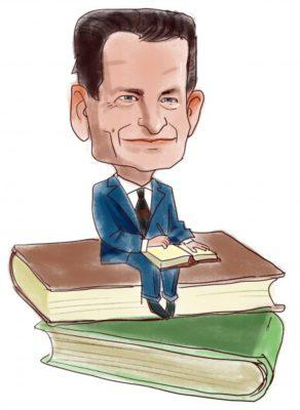

In [ ]:
print(news_title[3])
print(news_link[3])
img[3]

#DATA PREPARATION FOR MODEL BUILDING

In [184]:
from sklearn.preprocessing import MinMaxScaler

In [185]:
df_close_values = df.reset_index()['Close'][:-20]

In [186]:
# Scale each data into Range(0,1)

scaler = MinMaxScaler(feature_range=(0,1))
df_close_values = scaler.fit_transform(np.array(df_close_values).reshape(-1,1))

In [187]:
# Split Dataset into Training(80%) and Test data(20%)

training_size = int(len(df_close_values)*0.8)
train_data = df_close_values[0:training_size,:]
test_data = df_close_values[training_size:len(df_close_values),:1]

In [188]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [189]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [190]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM MODEL BUILDING

In [191]:
### Create the Stacked LSTM model
import math
from sklearn.metrics import mean_squared_error

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

ts = 100 ✅

dense layer 1 :- 16, 8 , acc% = 75.3

dense layer 2 :- 12, 8 , acc% = 73

In [192]:
# BASIC SINGLE LAYER MODEL
'''model = keras.Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.summary()'''

'model = keras.Sequential()\nmodel.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))\nmodel.add(Dense(1))\nmodel.summary()'

In [193]:
# MULTI LAYER MODEL (STACKED MODEL)
#ts = 60/80
'''model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=200, validation_data=(X_train, y_train), verbose=1)'''

"model=Sequential()\nmodel.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))\nmodel.add(LSTM(50,return_sequences=True))\nmodel.add(LSTM(50))\nmodel.add(Dense(1))\n\nmodel.compile(loss='mean_squared_error', optimizer='adam')\nmodel.fit(X_train, y_train, epochs=200, validation_data=(X_train, y_train), verbose=1)"

In [194]:
# DENSE LAYERS MODEL
# change df  value from 5yrs to 10yrs.
model = Sequential()
model.add(Dense(16, input_shape=(time_step,), activation='relu', use_bias=False))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=400)

Epoch 1/400
12/12 [==============================] - 0s 3ms/step - loss: 0.4743
Epoch 2/400
12/12 [==============================] - 0s 3ms/step - loss: 0.2030
Epoch 3/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0850
Epoch 4/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 5/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0187
Epoch 6/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0111
Epoch 7/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 8/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 9/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 10/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 11/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 12/400
12/12 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 13/400
12/12 [=================

In [195]:
'''model = Sequential([Input((X_train.shape[1], 1)),
                          LSTM(50),
                          Dense (8, activation='relu'),
                          Dense (1)])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, validation_data=(X_train, y_train), verbose=1)'''

"model = Sequential([Input((X_train.shape[1], 1)),\n                          LSTM(50),\n                          Dense (8, activation='relu'),\n                          Dense (1)])\nmodel.compile(loss='mean_squared_error', optimizer='adam')\nmodel.fit(X_train, y_train, epochs=100, validation_data=(X_train, y_train), verbose=1)"

In [196]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [197]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [198]:
print(f'RMSE measure for Training Data : {round(math.sqrt(mean_squared_error(y_train,train_predict)), 2)}')
print(f'RMSE measure for Test Data : {round(math.sqrt(mean_squared_error(y_test,test_predict)), 2)}')

RMSE measure for Training Data : 148.08
RMSE measure for Test Data : 155.67


In [199]:
### Plotting 
look_back=time_step

# shift train predictions for plotting
trainPredictPlot = np.empty_like(df_close_values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close_values)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close_values)-1, :] = test_predict

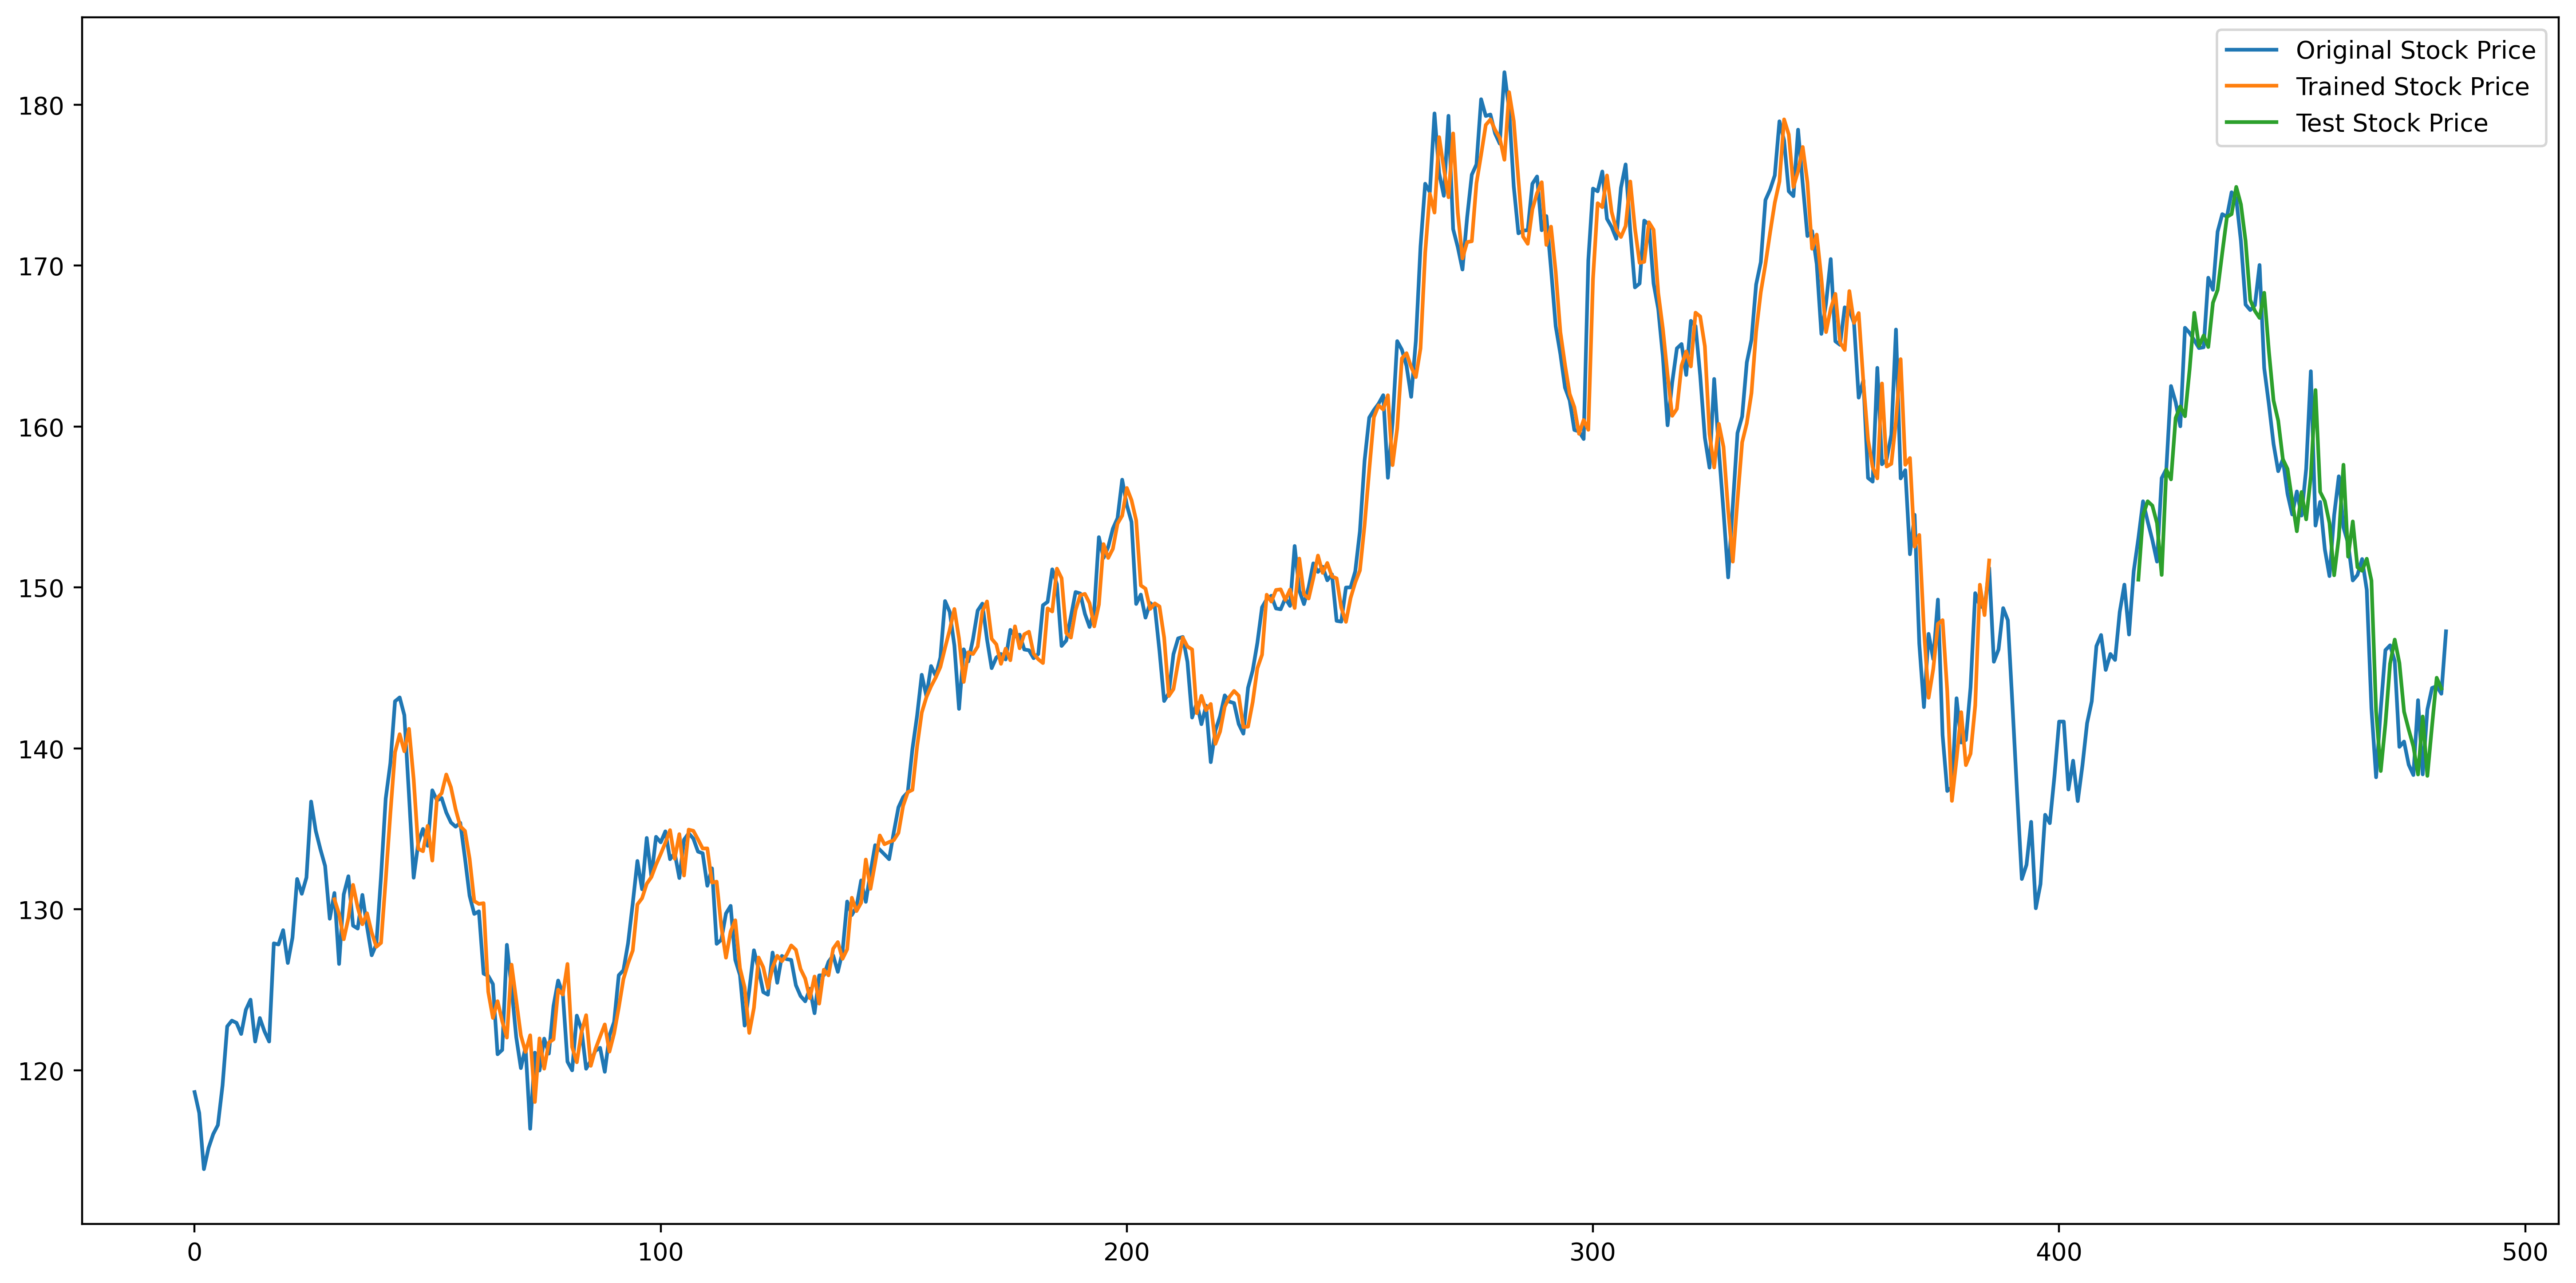

In [200]:
# plot baseline and predictions
plt.figure(dpi=400, figsize=(18, 9))
plt.plot(scaler.inverse_transform(df_close_values), label='Original Stock Price')
plt.plot(trainPredictPlot, label='Trained Stock Price')
plt.plot(testPredictPlot,  label='Test Stock Price')
plt.legend()
plt.show()

# Future Prediction

In [201]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)

In [202]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [203]:
# demonstrate prediction for next 20 days
lst_output=[]
n_steps=time_step
i=0
while(i<20):
    
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

[0.49912596]


In [204]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+21)

# Graphical Output

In [205]:
df4 = df.reset_index()['Close'].tolist()

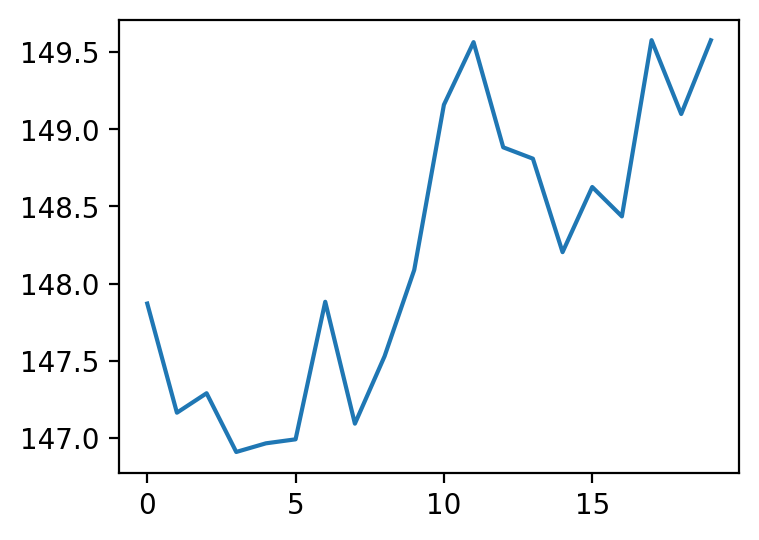

In [206]:
plt.figure(dpi=200, figsize=(4,3))
plt.plot(scaler.inverse_transform(lst_output))

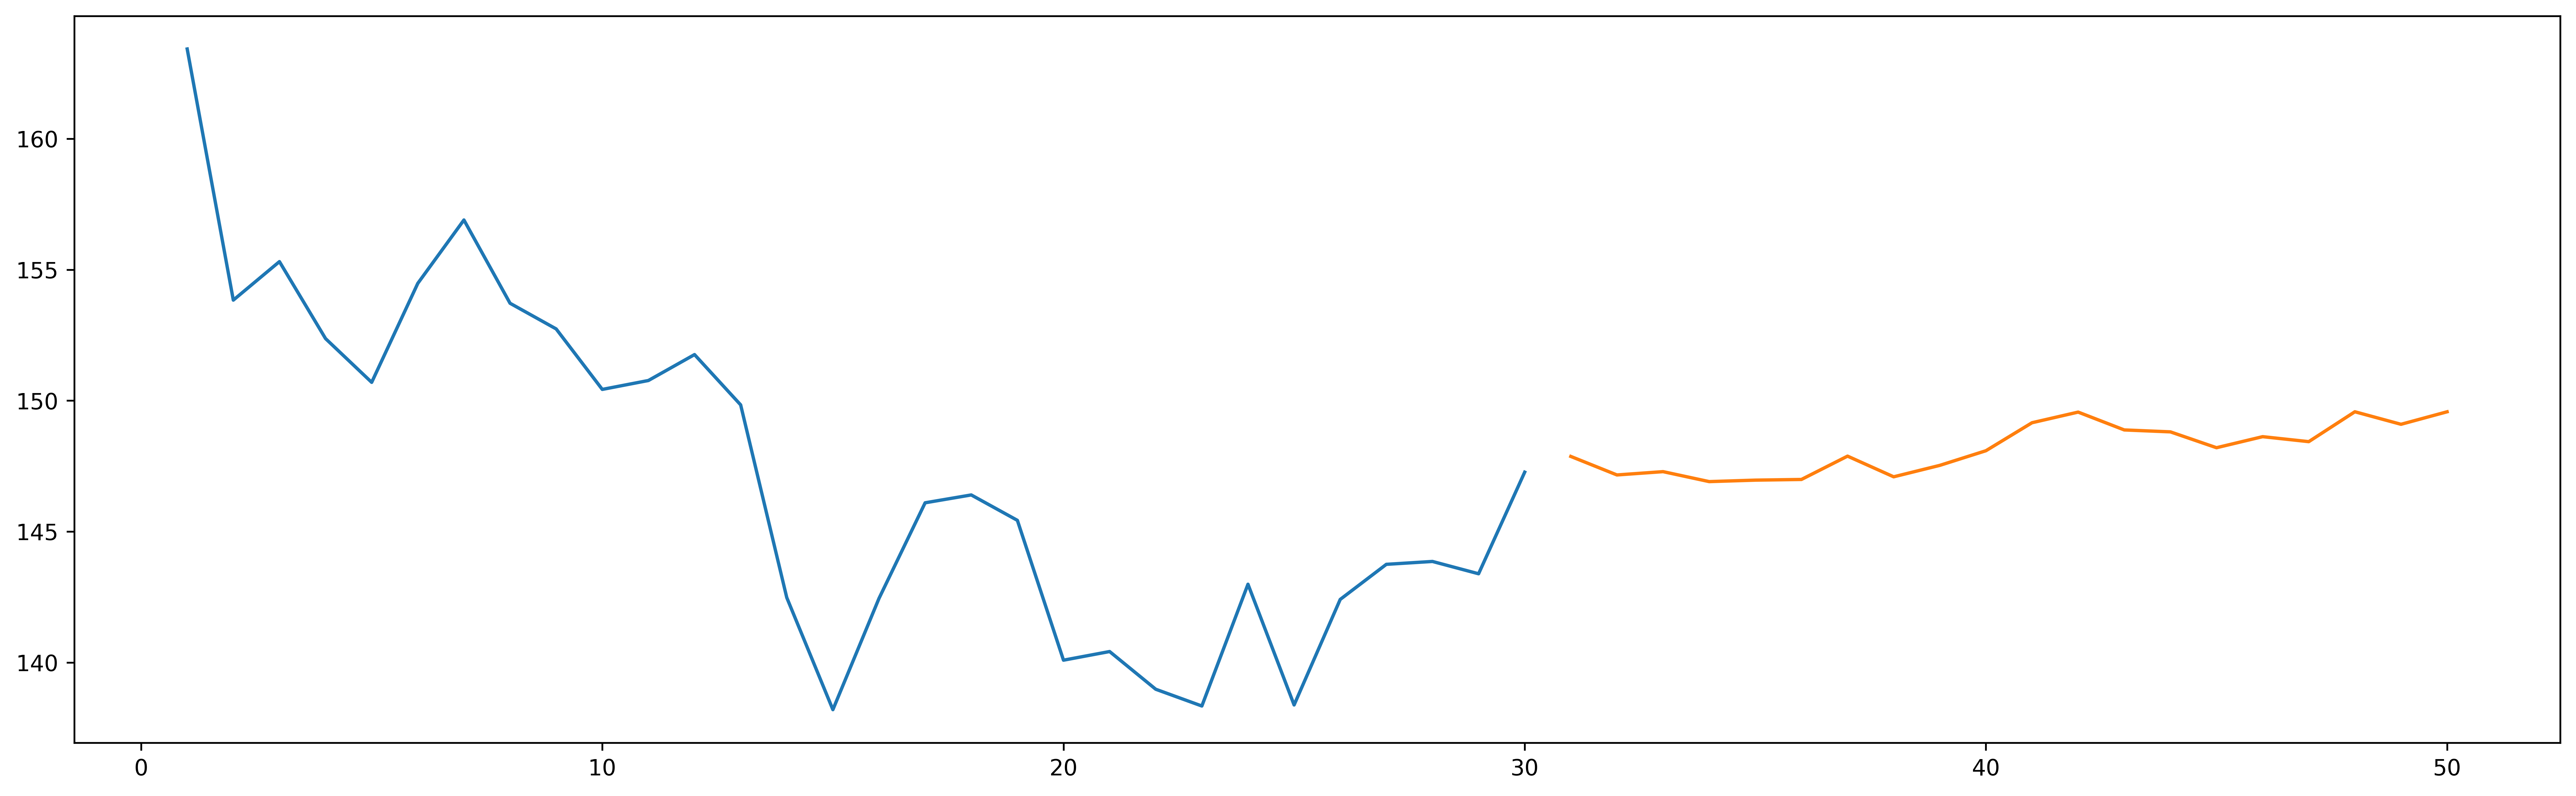

In [207]:
plt.figure(dpi=600, figsize=(20,6))

plt.plot(day_new,scaler.inverse_transform(df_close_values[len(df_close_values)-time_step:]) , label='STOCK PRICE')
plt.plot(day_pred,scaler.inverse_transform(lst_output) , label='FUTURE PREDICTED STOCK PRICE')

## GRAPHICAL COMPARSION WITH ORIGINAL VALUE

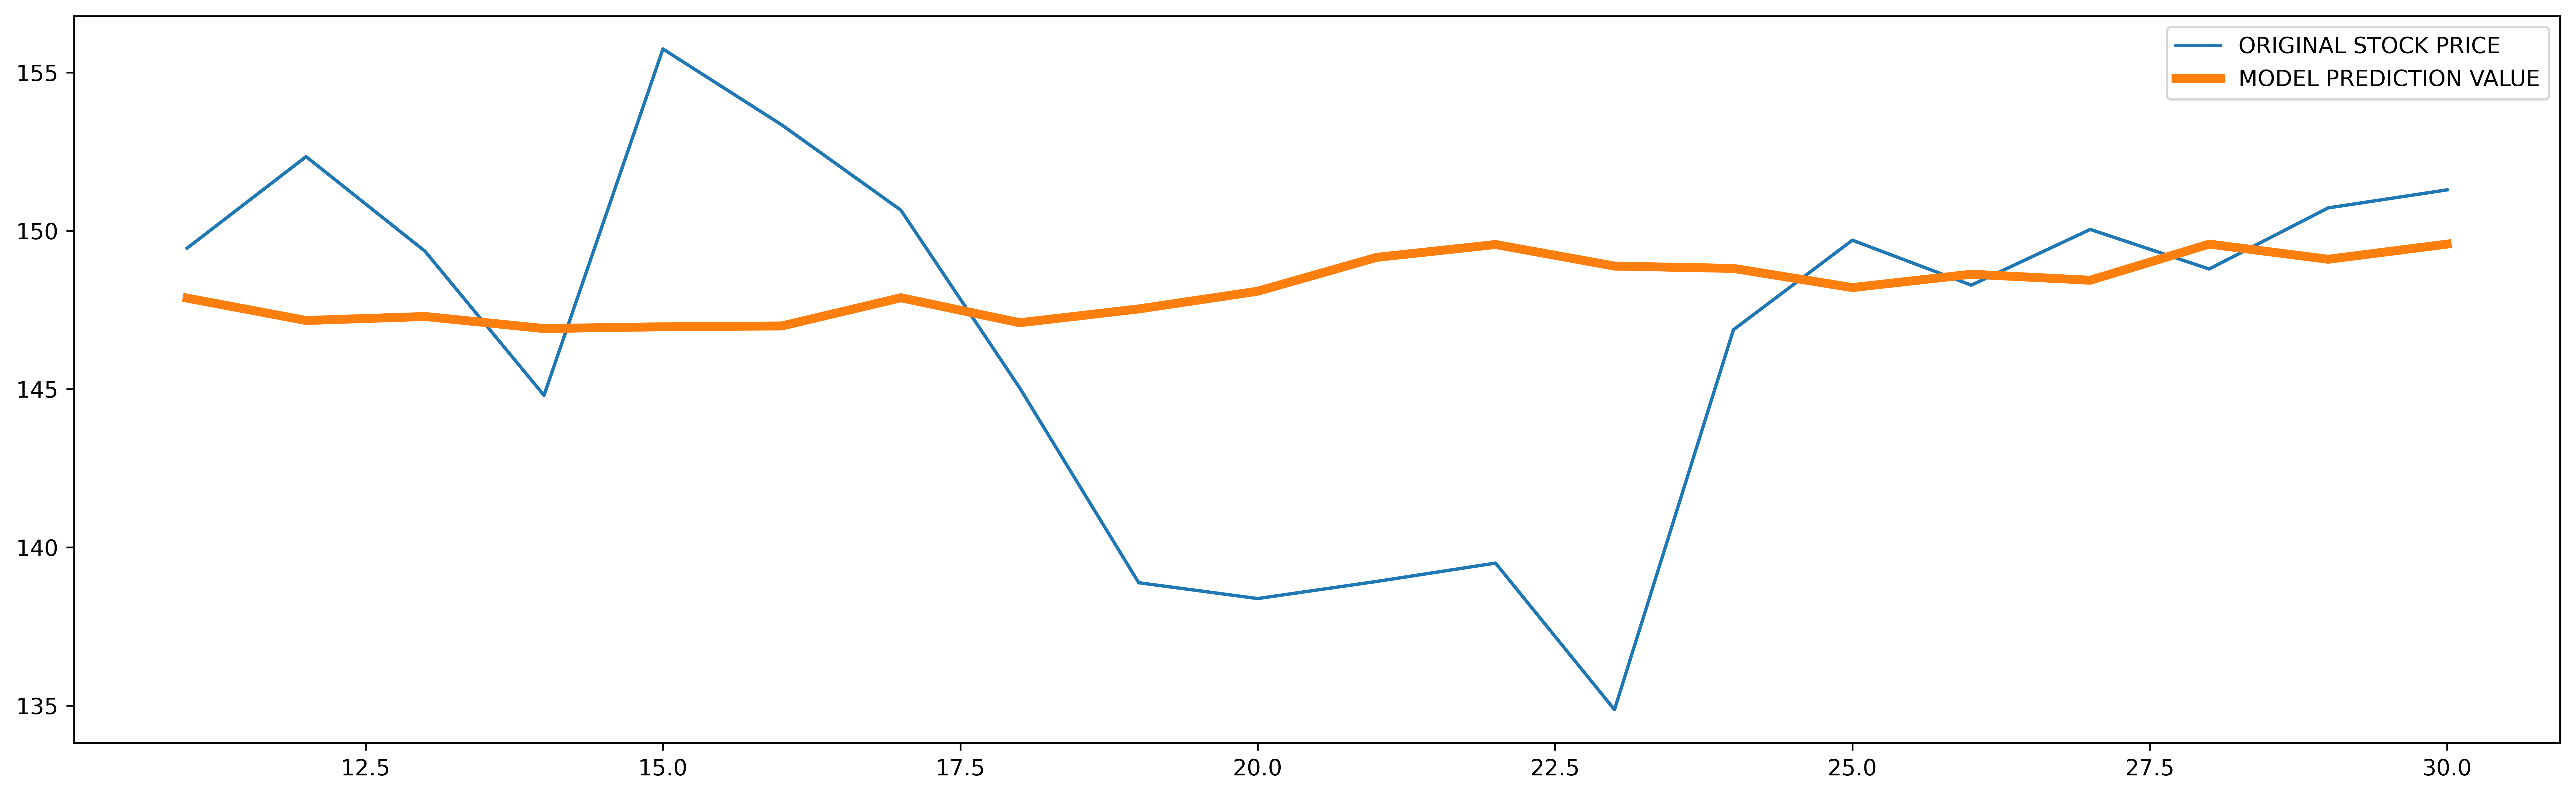

In [208]:
day_prediction = np.arange(time_step-19,time_step+1)

plt.figure(dpi=600, figsize=(20,6))

plt.plot(day_prediction,df4[len(df4)-20:], label='ORIGINAL STOCK PRICE')
plt.plot(day_prediction ,scaler.inverse_transform(lst_output) , label='MODEL PREDICTION VALUE', linewidth=4)
plt.legend()
plt.show()